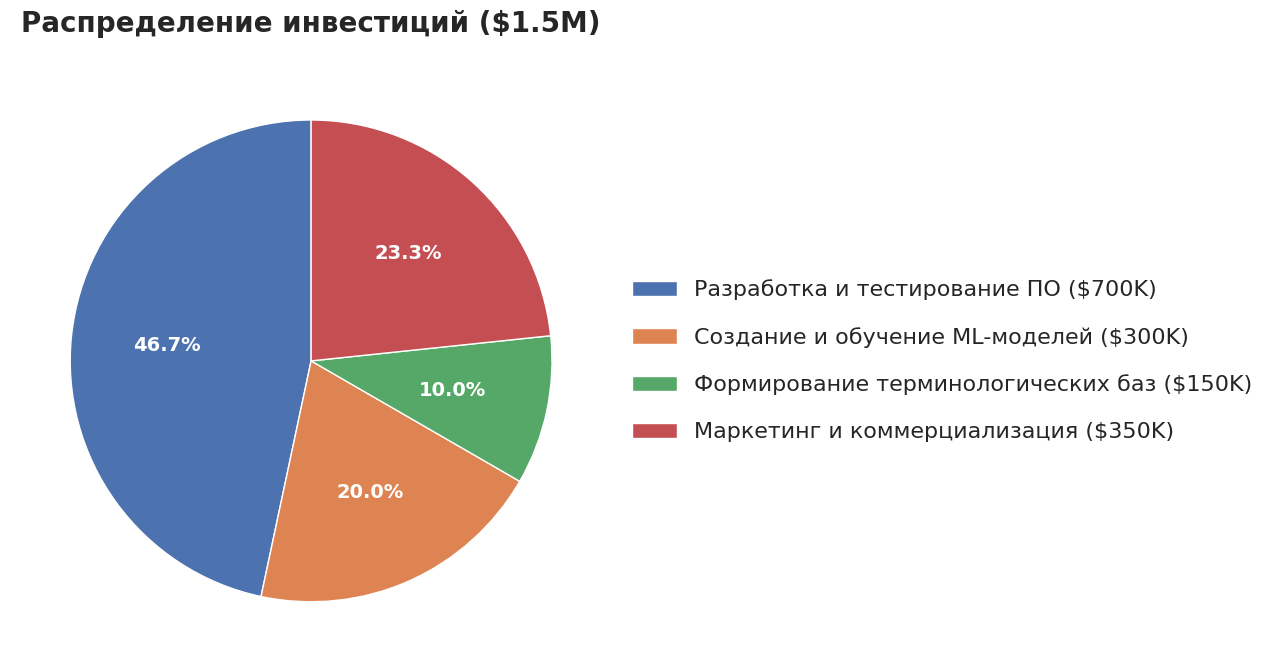

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12, 7)

# Данные по распределению инвестиций
investment_data = {
    'Разработка и тестирование ПО': 700000,
    'Создание и обучение ML-моделей': 300000,
    'Формирование терминологических баз': 150000,
    'Маркетинг и коммерциализация': 350000
}

# Настройка цветов
colors = sns.color_palette("deep", len(investment_data))

# Создание круговой диаграммы
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    investment_data.values(), 
    labels=None, 
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Улучшение стиля автоматических процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

# Добавление легенды с суммами
legend_labels = [f"{key} (${value/1000:.0f}K)" for key, value in investment_data.items()]
ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, .5), 
          labelspacing=1.2, fontsize=16)  # Увеличиваем расстояние между строками и шрифт легенды

# Добавление заголовка с увеличенным шрифтом
ax.set_title('Распределение инвестиций ($1.5M)', fontsize=20, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Раскомментируйте для сохранения
# plt.savefig('investment_distribution.png', dpi=300, bbox_inches='tight')

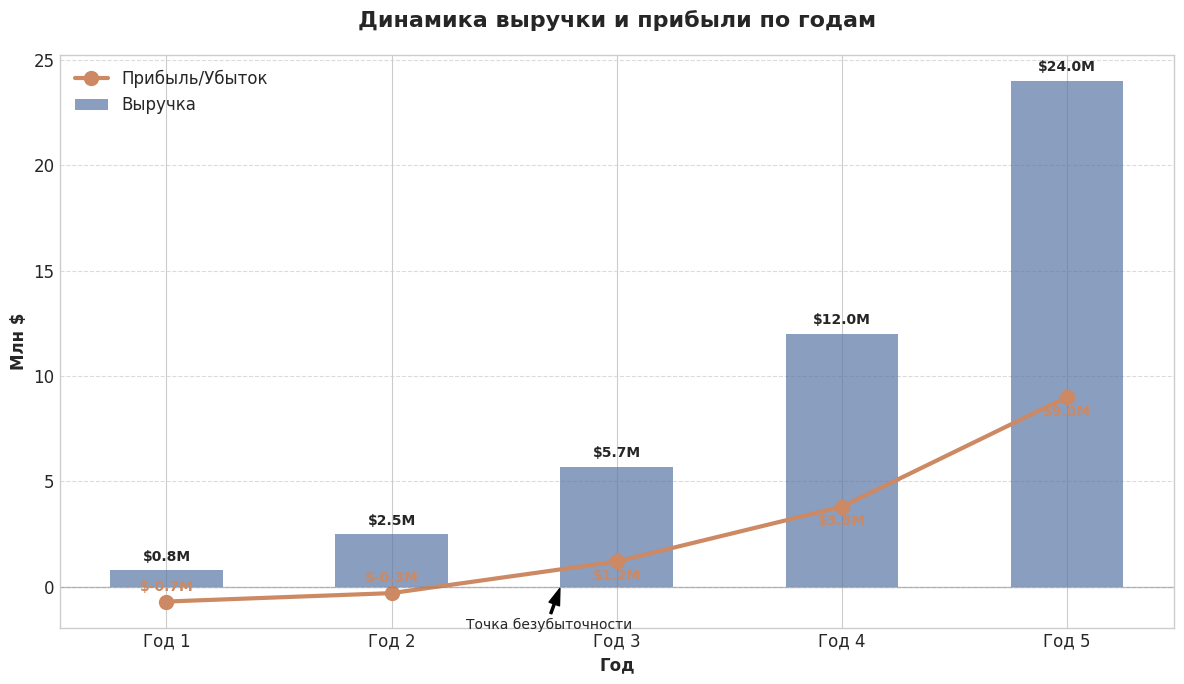

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (12, 7)

# Данные по годам
years = [1, 2, 3, 4, 5]
revenue = [0.8, 2.5, 5.7, 12.0, 24.0]  # в млн $
profit = [-0.7, -0.3, 1.2, 3.8, 9.0]  # в млн $

fig, ax = plt.subplots()

# Создание столбчатой диаграммы для выручки
bars = ax.bar(years, revenue, color='#5975a4', alpha=0.7, width=0.5, label='Выручка')

# Добавление линии прибыли
line = ax.plot(years, profit, marker='o', color='#cc8963', linewidth=3, 
              markersize=10, label='Прибыль/Убыток')

# Добавление горизонтальной линии на нуле для наглядности убытков/прибыли
ax.axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)

# Добавление подписей значений над столбцами
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'${revenue[i]}M', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Добавление подписей значений к точкам прибыли
for i, val in enumerate(profit):
    ax.text(years[i], val + (0.7 if val < 0 else -0.7), 
            f'${profit[i]}M', ha='center', va='center', 
            fontsize=10, fontweight='bold', color='#cc8963')

# Настройка осей
ax.set_xlabel('Год', fontsize=12, fontweight='bold')
ax.set_ylabel('Млн $', fontsize=12, fontweight='bold')
ax.set_xticks(years)
ax.set_xticklabels([f'Год {y}' for y in years])

# Добавление сетки только по оси Y
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Добавление легенды
ax.legend(fontsize=12)

# Добавление заголовка
ax.set_title('Динамика выручки и прибыли по годам', fontsize=16, fontweight='bold', pad=20)

# Добавление аннотации для точки безубыточности
ax.annotate('Точка безубыточности', xy=(2.75, 0), xytext=(2.7, -2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# Раскомментируйте для сохранения
# plt.savefig('revenue_profit_growth.png', dpi=300, bbox_inches='tight')

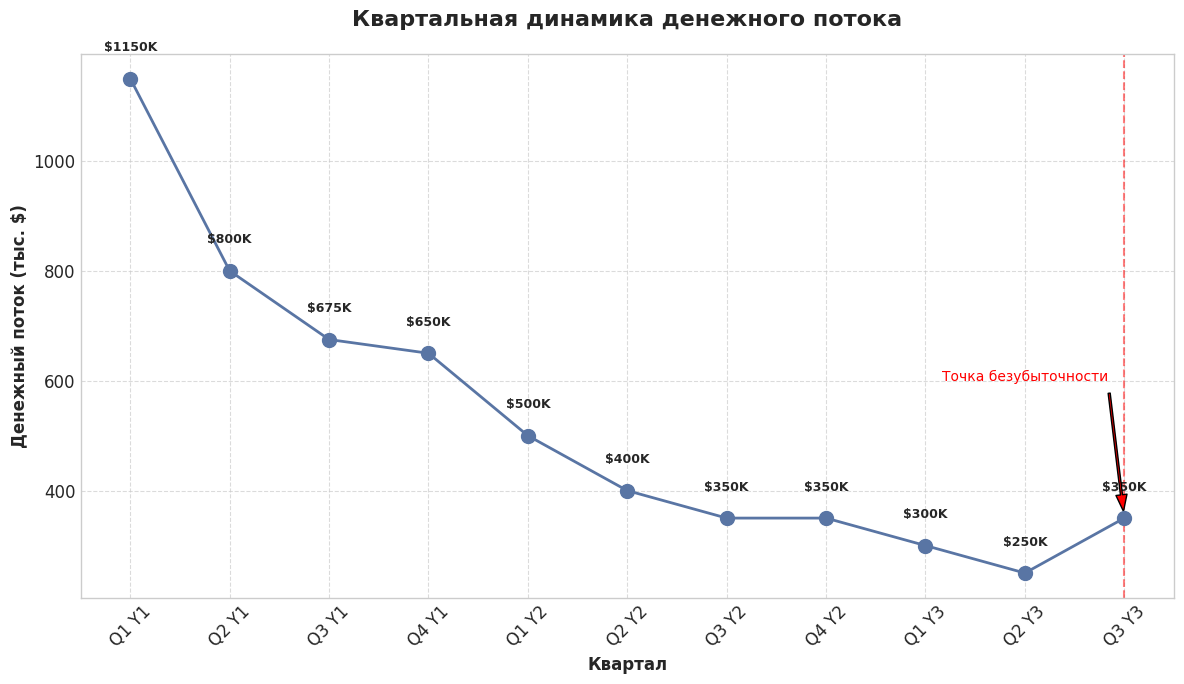

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (12, 7)

# Данные по квартальному cash flow (в тыс. $)
# Создаем массив с названиями кварталов
quarters = ['Q1 Y1', 'Q2 Y1', 'Q3 Y1', 'Q4 Y1', 
            'Q1 Y2', 'Q2 Y2', 'Q3 Y2', 'Q4 Y2', 
            'Q1 Y3', 'Q2 Y3', 'Q3 Y3']

# Значения денежного потока по кварталам
cash_flow = [1150, 800, 675, 650, 500, 400, 350, 350, 300, 250, 350]

fig, ax = plt.subplots()

# Создание линейного графика
ax.plot(quarters, cash_flow, marker='o', linestyle='-', linewidth=2, markersize=8, color='#5975a4')

# Добавление точек
for i, (q, cf) in enumerate(zip(quarters, cash_flow)):
    ax.scatter(i, cf, s=100, color='#5975a4', zorder=5)
    
# Добавление подписей значений у точек
for i, cf in enumerate(cash_flow):
    ax.text(i, cf + 50, f'${cf}K', ha='center', fontsize=9, fontweight='bold')

# Отметка точки безубыточности
breakeven_quarter = 'Q3 Y3'
if breakeven_quarter in quarters:
    breakeven_index = quarters.index(breakeven_quarter)
    ax.annotate('Точка безубыточности', 
               xy=(breakeven_index, 350), 
               xytext=(breakeven_index - 1, 600),
               arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=8),
               fontsize=10, color='red', ha='center')
    
    # Добавление вертикальной пунктирной линии
    ax.axvline(x=breakeven_index, color='red', linestyle='--', alpha=0.5)

# Настройка осей
ax.set_xlabel('Квартал', fontsize=12, fontweight='bold')
ax.set_ylabel('Денежный поток (тыс. $)', fontsize=12, fontweight='bold')

# Установка позиций для меток оси X
ax.set_xticks(range(len(quarters)))
ax.set_xticklabels(quarters)

# Добавление сетки
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Поворот меток оси X для лучшей читаемости
plt.xticks(rotation=45)

# Добавление заголовка
ax.set_title('Квартальная динамика денежного потока', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Раскомментируйте для сохранения
# plt.savefig('cash_flow_dynamics.png', dpi=300, bbox_inches='tight')

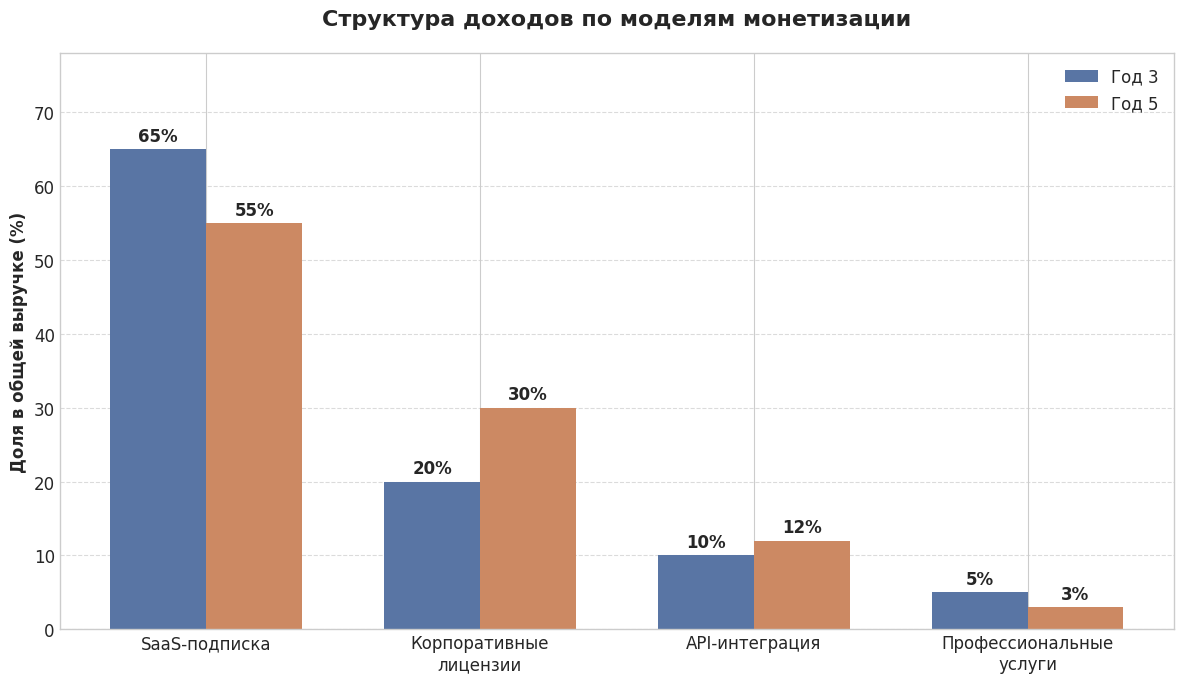

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (12, 7)

# Данные по структуре доходов
revenue_models = ['SaaS-подписка', 'Корпоративные\nлицензии', 'API-интеграция', 'Профессиональные\nуслуги']
year3_percents = [65, 20, 10, 5]
year5_percents = [55, 30, 12, 3]

x = np.arange(len(revenue_models))  # Позиции меток
width = 0.35  # Ширина столбцов

fig, ax = plt.subplots()

# Создание сгруппированных столбцов
bars1 = ax.bar(x - width/2, year3_percents, width, label='Год 3', color='#5975a4')
bars2 = ax.bar(x + width/2, year5_percents, width, label='Год 5', color='#cc8963')

# Добавление подписей процентов над столбцами
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 пункта вертикального смещения
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')

add_labels(bars1)
add_labels(bars2)

# Настройка осей
ax.set_ylabel('Доля в общей выручке (%)', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(revenue_models)

# Добавление сетки только по оси Y
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Ограничение диапазона оси Y для лучшей наглядности
ax.set_ylim(0, max(max(year3_percents), max(year5_percents)) * 1.2)

# Добавление легенды
ax.legend()

# Добавление заголовка
ax.set_title('Структура доходов по моделям монетизации', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Раскомментируйте для сохранения
# plt.savefig('revenue_structure.png', dpi=300, bbox_inches='tight')